In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans

In [3]:
!pwd

/home/khalil/VAS/developement _and_analysis


In [ ]:
image_path="./cropped_image.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

[ WARN:0@4.826] global loadsave.cpp:241 findDecoder imread_('./cropped_img.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


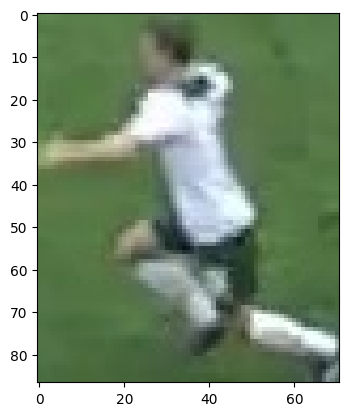

In [7]:
plt.imshow(image)
plt.show()

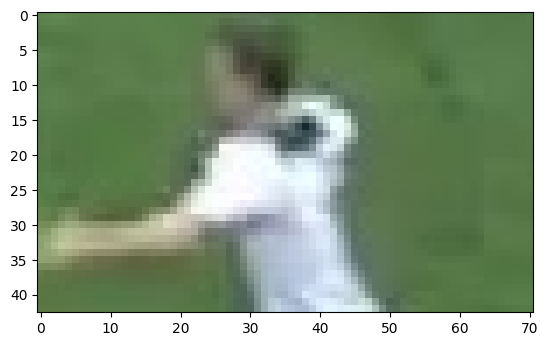

In [14]:
#take the top half of the image 
top_half_image= image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

# CLuster image in 2 clusters

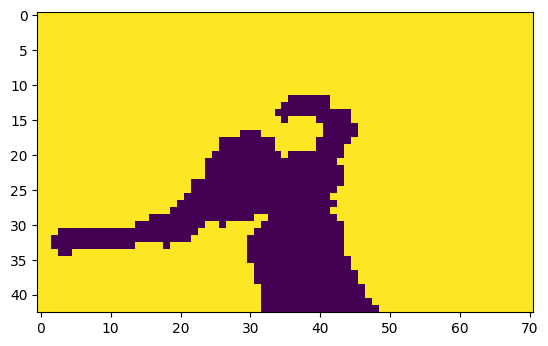

In [28]:
#reshape the image in 2d array
image_2d = top_half_image.reshape(-1,3)

#perform k-means clustering with 2 clusters
kmeans= KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels=kmeans.labels_

#reshape the labels into the original image shape 
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [29]:
#to detect the class of background if 0 or 1 (detect the number assu=igne to background)
corner_clusters= [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters),key=corner_clusters.count) #the number who apppears the most in these corners 
print(non_player_cluster)


#now assign the value for the player based on the background
player_cluster = 1-non_player_cluster
print(player_cluster)

1
0


In [30]:
kmeans.cluster_centers_[player_cluster]


array([199.1364486 , 209.07663551, 211.65981308])